# Exploratory Data Analysis
## Group 27
### January 2022

With your datasets sourced and cleaned now you will begin exploring the data. This entails performing Exploratory Data Analysis (EDA). EDA is used to understand and summarize the contents of a dataset. In this case, EDA will be used to help you investigate the specific questions for the business problem proposed for your capstone project. EDA relies heavily on visualizing the data to assess patterns and identify data characteristics. Please use the **Six Steps of Exploratory Data Analysis** outlined below to help guide your work. Refer back to your project scoping document where you have outlined the specific business problems you are looking to solve.

Selecting columns of interest and target feature(s)
* Which columns in your data sets will help you answer the questions posed by
your problem statement? 
* Which columns represent the key pieces of information you want to examine (i.e.
your target variables)?
* How many numerical, textual, datetime etc. columns are in your dataset?
* Pick out any similar columns among your disparate data sets for potential linking
later on on the EDA process

Explore Individual columns for preliminary insights
* How many null values are present in your data (what percentage)?
* Plot one-dimensional distributions of numerical columns (ex. histograms) and
observe the overall shape of the data (i.e. normal distribution, skewed,
multimodal, discontinuous
* Compute basic statistics of numerical columns
* Calculate subgroup size of text/categorical data (such as the pd.value_counts()
method)
* Explore any date/datetime columns for basic trends. How long is the period of
time covered by the dataset? Do any seasonality trends immediately become
apparent?

 Plot two-dimensional distributions of your variables of interest against your target
variable(s).
* Across different values of your independent variable, how does the dependent
variable change?
* Which interactions of variables provide the most interesting insights?
* What trends do you see in the data? Do they support or contradict the hypothesis
of your problem statement?

Analyze any correlations between your independent and dependent variables
* Understand and resolve surprising correlations between these variables, and use this information to validate your initial hypothesis.

Craft a compelling story from the work you’ve done in the previous steps
* Which charts, graphs, and tables provide the most compelling evidence in
support of your project idea?
* If your data analysis has largely disproved your initial hypothesis, can you craft a
narrative for this alternative?


In [20]:
# Packages
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

#### Reading Datasets

In [33]:
# Read CPS
#cps_path = '../../datasets/Mississipi/'
cps_path = '/home/jovyan/team_27_final_project/' # Uncomment for Drea
cps_csvfile = 'CPS_2019Data_MS.csv'
cps_df = pd.read_csv(cps_path + cps_csvfile)

## CPS First exploration

In [34]:
cps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  2692 non-null   int64
 1   HEFAMINC    2692 non-null   int64
 2   HRHTYPE     2692 non-null   int64
 3   PTDTRACE    2692 non-null   int64
 4   PREMPNOT    2692 non-null   int64
 5   PRCHLD      2692 non-null   int64
 6   HETS2O      2692 non-null   int64
 7   HETS6O      2692 non-null   int64
 8   HETS8CO     2692 non-null   int64
 9   HESP1       2692 non-null   int64
 10  HETSP3O     2692 non-null   int64
dtypes: int64(11)
memory usage: 231.5 KB


In [35]:
cps_df.head()

,Unnamed: 0,HEFAMINC,HRHTYPE,PTDTRACE,PREMPNOT,PRCHLD,HETS2O,HETS6O,HETS8CO,HESP1,HETSP3O
0,2292,8,1,1,1,4,-1,-1,-1,-1,-1
1,2293,8,1,1,4,4,-1,-1,-1,-1,-1
2,2294,8,1,1,4,0,-1,-1,-1,-1,-1
3,2295,8,1,1,-1,0,-1,-1,-1,-1,-1
4,2296,10,7,1,4,0,-1,30,20,-1,-1


In [45]:
# Creating a list of 10 columns that we are going to keep
cps_df = cps_df.rename(columns={'HEFAMINC':'FAMILY_INCOME','HRHTYPE':'HOUSEHOLD_TYPE', 
                        'PTDTRACE':'RACE', 'PREMPNOT':'EMPLOYMENT_STATUS', 
                        'PRCHILD':'PRESENCE_OF_CHILDREN_UNDER_18YO', 'HETS2O':'HOUSEHOLD_PURCHASES_GROCERIES', 
                        'HETS6O':'HOUSEHOLD_PURCHASES_RESTAURANTS', 
                        'HETS8CO': 'AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED', 
                        'HETSP3O':'FOODSTAMPS_AMT_PERMONTH', 'HESP1':'Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS'})

In [46]:
cps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Unnamed: 0                                 2692 non-null   int64
 1   FAMILY_INCOME                              2692 non-null   int64
 2   HOUSEHOLD_TYPE                             2692 non-null   int64
 3   RACE                                       2692 non-null   int64
 4   EMPLOYMENT_STATUS                          2692 non-null   int64
 5   PRCHLD                                     2692 non-null   int64
 6   HOUSEHOLD_PURCHASES_GROCERIES              2692 non-null   int64
 7   HOUSEHOLD_PURCHASES_RESTAURANTS            2692 non-null   int64
 8   AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED  2692 non-null   int64
 9   Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS     2692 non-null   int64
 10  FOODSTAMPS_AMT_PERMONTH                    2692 

In [48]:
#Checked for any null values and showed count, mean, std
cps_df.isnull().values.any()
cps_df.describe()
cps_df.to_csv('/home/jovyan/team_27_final_project/cps_clean_table2019.csv')
cps_df.head()

,Unnamed: 0,FAMILY_INCOME,HOUSEHOLD_TYPE,RACE,EMPLOYMENT_STATUS,PRCHLD,HOUSEHOLD_PURCHASES_GROCERIES,HOUSEHOLD_PURCHASES_RESTAURANTS,AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED,Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS,FOODSTAMPS_AMT_PERMONTH
0,2292,8,1,1,1,4,-1,-1,-1,-1,-1
1,2293,8,1,1,4,4,-1,-1,-1,-1,-1
2,2294,8,1,1,4,0,-1,-1,-1,-1,-1
3,2295,8,1,1,-1,0,-1,-1,-1,-1,-1
4,2296,10,7,1,4,0,-1,30,20,-1,-1


In [39]:
#Reading in clean files
cps_path = '/home/jovyan/team_27_final_project/' # Uncomment for Drea
cps_csvfile = 'cps_clean_table2019.csv'
cps2019_df = pd.read_csv(cps_path + cps_csvfile)

In [40]:
cps2019_df.head()
# When we finalize this we need to drop unnamed column and change name for unnamed 0.1 as it represents the family 
# number

,Unnamed: 0,Unnamed: 0.1,FAMILY_INCOME,HOUSEHOLD_TYPE,RACE,EMPLOYMENT_STATUS,PRCHLD,HOUSEHOLD_PURCHASES_GROCERIES,HOUSEHOLD_PURCHASES_RESTAURANTS,AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED,Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS,FOODSTAMPS_AMT_PERMONTH
0,0,2292,8,1,1,1,4,-1,-1,-1,-1,-1
1,1,2293,8,1,1,4,4,-1,-1,-1,-1,-1
2,2,2294,8,1,1,4,0,-1,-1,-1,-1,-1
3,3,2295,8,1,1,-1,0,-1,-1,-1,-1,-1
4,4,2296,10,7,1,4,0,-1,30,20,-1,-1


<AxesSubplot:title={'center':'Family Income Plot'}, xlabel='FAMILY_INCOME'>

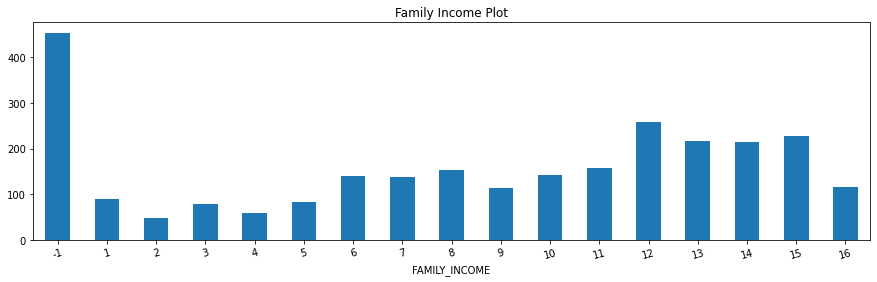

In [42]:
# Plotting based on family income
plt.figure(figsize=(15,4))
family_income = cps2019_df.groupby(cps2019_df['FAMILY_INCOME']).size()
family_income.plot.bar(rot=15, title='Family Income Plot')
# Key for family income:
# We need to add a legend to the plots to show what the numbers represent
# -1 represents no income/answer provided.  Don't remove
#1 LESS THAN $5,000
#2 5,000 TO 7,499
#3 7,500 TO 9,999
#4 10,000 TO 12,499
#5 12,500 TO 14,999
#6 15,000 TO 19,999
#7 20,000 TO 24,999
#8 25,000 TO 29,999
#9 30,000 TO 34,999
#10 35,000 TO 39,999
#11 40,000 TO 49,999
#12 50,000 TO 59,999
#13 60,000 TO 74,999
#14 75,000 TO 99,999
#15 100,000 TO 149,999
#16 150,000 OR MORE

<AxesSubplot:title={'center':'Family Income Plot'}, xlabel='FAMILY_INCOME'>

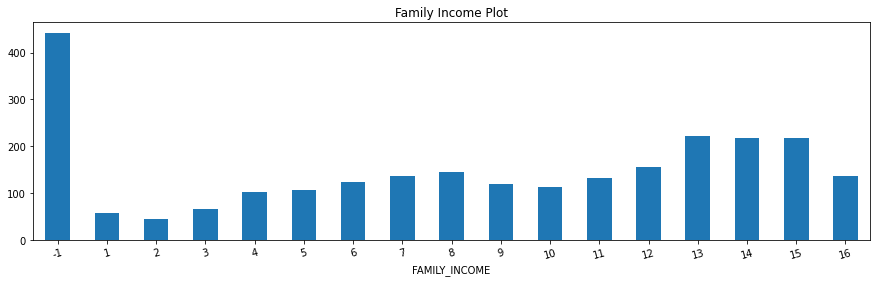

In [43]:
#Reading in clean files
cps_path = '/home/jovyan/team_27_final_project/' # Uncomment for Drea
cps_csvfile = 'cps_clean_table2020.csv'
cps2020_df = pd.read_csv(cps_path + cps_csvfile)
# Plotting based on family income
plt.figure(figsize=(15,4))
family_income_2020 = cps2020_df.groupby(cps2020_df['FAMILY_INCOME']).size()
family_income_2020.plot.bar(rot=15, title='Family Income Plot')
# Key for family income:
# We need to add a legend to the plots to show what the numbers represent
# -1 represents no income/answer provided.  Don't remove
#1 LESS THAN $5,000
#2 5,000 TO 7,499
#3 7,500 TO 9,999
#4 10,000 TO 12,499
#5 12,500 TO 14,999
#6 15,000 TO 19,999
#7 20,000 TO 24,999
#8 25,000 TO 29,999
#9 30,000 TO 34,999
#10 35,000 TO 39,999
#11 40,000 TO 49,999
#12 50,000 TO 59,999
#13 60,000 TO 74,999
#14 75,000 TO 99,999
#15 100,000 TO 149,999
#16 150,000 OR MORE

<AxesSubplot:title={'center':'Children Present Plot'}, xlabel='PRCHLD'>

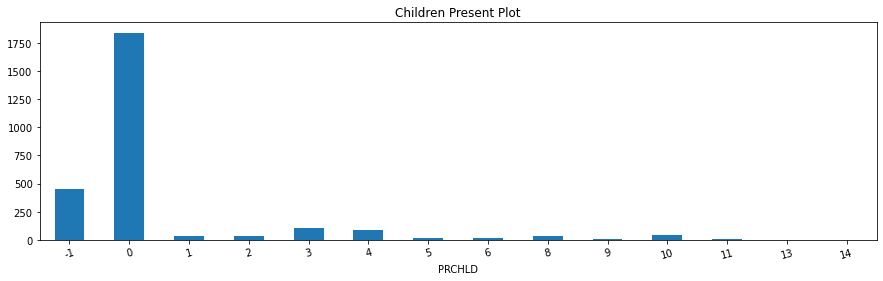

In [49]:
plt.figure(figsize=(15,4))
child_present = cps2019_df.groupby(cps2019_df['PRCHLD']).size()
child_present.plot.bar(rot=15, title='Children Present Plot')
#Child Present
#-1 NIU (Not a parent)
#0 No own children under 18 years of age
#1 All own children 0- 2 years of age
#2 All own children 3- 5 years of age
#3 All own children 6-13 years of age
#4 All own children 14-17 years of age
#5 Own children 0- 2 and 3- 5 years of age (none 6-17)
#6 Own children 0- 2 and 6-13 years of age (none 3- 5 or 14-17)
#7 Own children 0- 2 and 14-17 years of age (none 3-13)
#8 Own children 3- 5 and 6-13 years of age (none 0- 2 or 14-17)
#9 Own children 3- 5 and 14-17 years of age (none 0- 2 or 6-13)
# 10 Own children 6-13 and 14-17 years of age (none 0- 5)
# 11 Own children 0- 2, 3- 5, and 6-13 years of age (none 14-17)
# 12 Own children 0- 2, 3- 5, and 14-17 years of age (none 6-13)
# 13 Own children 0- 2, 6-13, and 14-17 years of age (none 3- 5)
# 14 Own children 3- 5, 6-13, and 14-17

<AxesSubplot:title={'center':'Employment Status Plot'}, xlabel='EMPLOYMENT_STATUS'>

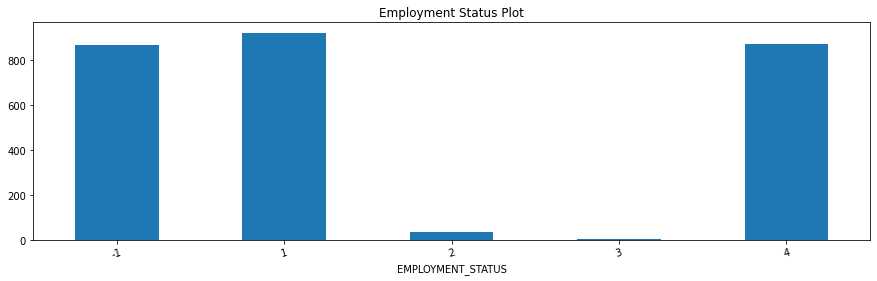

In [50]:
plt.figure(figsize=(15,4))
employment_status = cps2019_df.groupby(cps2019_df['EMPLOYMENT_STATUS']).size()
employment_status.plot.bar(rot=15, title='Employment Status Plot')

<AxesSubplot:title={'center':'Buys Groceries Plot'}, xlabel='HOUSEHOLD_PURCHASES_GROCERIES'>

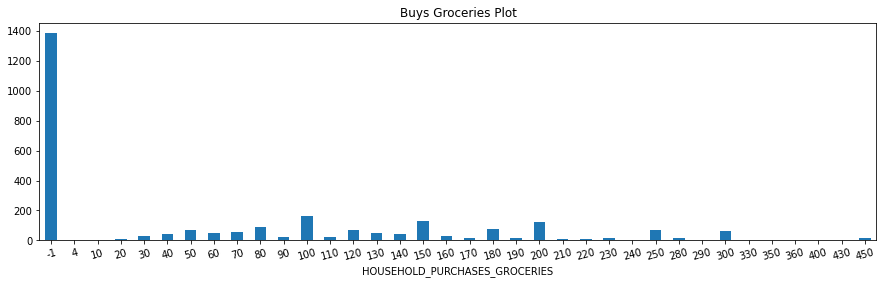

In [51]:
plt.figure(figsize=(15,4))
household_purchases_groceries = cps2019_df.groupby(cps2019_df['HOUSEHOLD_PURCHASES_GROCERIES']).size()
household_purchases_groceries.plot.bar(rot=15, title='Buys Groceries Plot')

<AxesSubplot:title={'center':'Eat Out Plot'}, xlabel='HOUSEHOLD_PURCHASES_RESTAURANTS'>

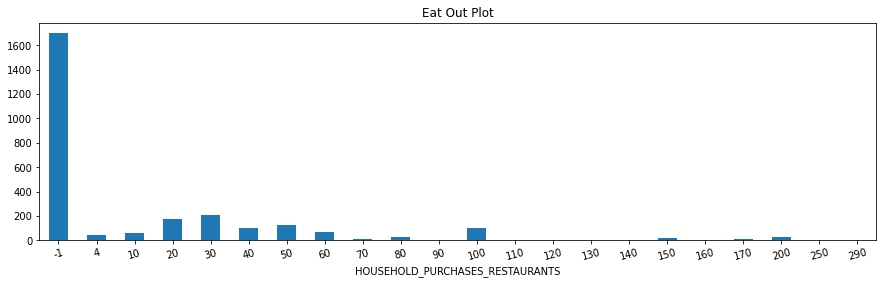

In [54]:
plt.figure(figsize=(15,4))
restaurants = cps2019_df.groupby(cps2019_df['HOUSEHOLD_PURCHASES_RESTAURANTS']).size()
restaurants.plot.bar(rot=15, title='Eat Out Plot')

<AxesSubplot:title={'center':'Food Benefits Plot'}, xlabel='Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS'>

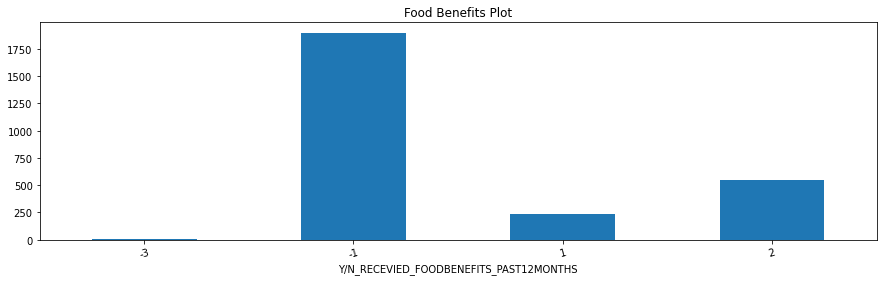

In [52]:
plt.figure(figsize=(15,4))
food_benefits = cps2019_df.groupby(cps2019_df['Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS']).size()
food_benefits.plot.bar(rot=15, title='Food Benefits Plot')

<AxesSubplot:title={'center':'Food Stamp Amount Plot'}, xlabel='FOODSTAMPS_AMT_PERMONTH'>

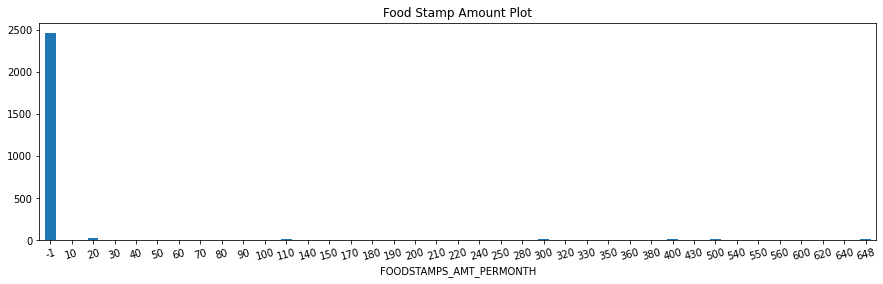

In [53]:
plt.figure(figsize=(15,4))
stamp_amount = cps2019_df.groupby(cps2019_df['FOODSTAMPS_AMT_PERMONTH']).size()
stamp_amount.plot.bar(rot=15, title='Food Stamp Amount Plot')